# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [29]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


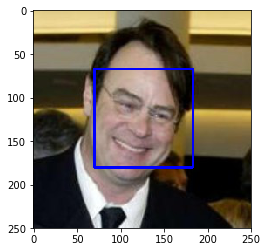

In [30]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [31]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
In 17% of dog images the algorithm has identified human face(s). The algorithm detects human faces in 98% of all human images. I have observed that in some dog images there are human faces, so the high rate of human faces in dog images is not only due to the errors in the face detection algorithm. 

In [32]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_face_res = [int(face_detector(img_path)) for img_path in tqdm(human_files_short)]
dog_face_res = [int(face_detector(img_path)) for img_path in tqdm(dog_files_short)]


100%|██████████| 100/100 [00:29<00:00,  3.40it/s]


In [33]:
from PIL import Image
Image.LOAD_TRUNCATED_IMAGES = True
def plot_image(img_file):
    """ 
    Takes a path to an image file and displays it.
    
    """
    plt.figure()
    plt.imshow(Image.open(img_file))

In [34]:
import random
false_pos = [dog_files_short[i] for i in range(len(dog_face_res)) if dog_face_res[i] > 0]
false_pos_subset = random.sample(false_pos,5)

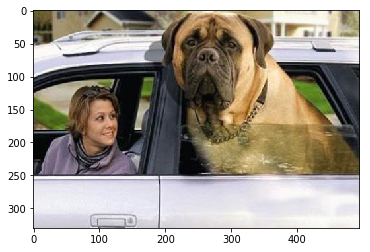

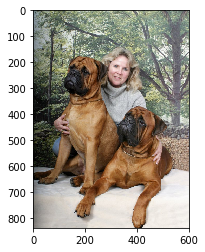

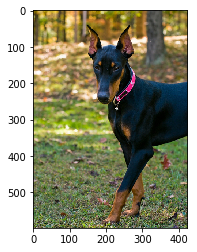

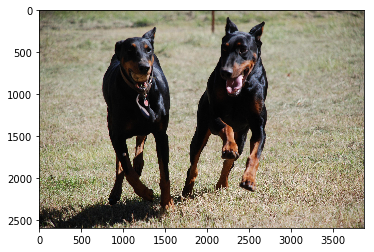

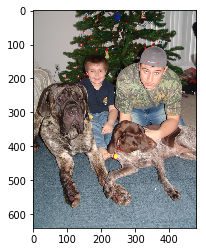

In [35]:
%matplotlib inline
# display randomly some dog images where a human face has been detected.
for img_file in false_pos_subset:
    plot_image(img_file)

In [36]:
print('The percentage of false positives (dogs classified as humans) is: {} '.format(sum(dog_face_res)/len(dog_face_res)*100))
print('The percentage of true positives (correctly identified humans) is: {} '.format(sum(human_face_res)/len(human_face_res)*100))

The percentage of false positives (dogs classified as humans) is: 17.0 
The percentage of true positives (correctly identified humans) is: 98.0 


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [37]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [38]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:25<00:00, 21729816.73it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [39]:
from PIL import Image
Image.LOAD_TRUNCATED_IMAGES = True
import torchvision.transforms as transforms
                      
%matplotlib inline 
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    im = Image.open(img_path)
    preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[n),
    ])
    input_tensor = preprocess(im)
    input_batch = input_tensor.unsqueeze(0)
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        VGG16.to('cuda')

    with torch.no_grad():
        output = VGG16(input_batch)

    # The output has unnormalized scores. To get probabilities, you can run a softmax on it.
    prob = torch.nn.functional.softmax(output[0], dim=0)
   
    return int(np.argmax(prob))# predicted class index

236


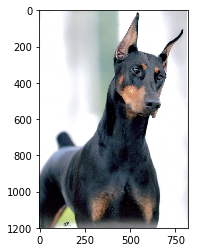

In [40]:
%matplotlib inline
print(VGG16_predict(dog_files[100]))
plot_image(dog_files[100])

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [41]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    pred = VGG16_predict(img_path)
    retval = False
    if pred>=151 and pred<=268:
        retval = True
    return retval # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ All images in dog_files_short have been detected as dogs and zero images in dog_files_short have been identified as humans.


In [42]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
humans_as_dogs_VGG16 = [dog_detector(img_path) for img_path in human_files_short]
dogs_VGG16 = [dog_detector(img_path) for img_path in dog_files_short]

In [43]:
%matplotlib inline 
# plot false positives, if any.
for i,res in enumerate(humans_as_dogs_VGG16):
    if res:
        plot_image(human_files_short[i])

In [44]:
print('The percentage of false positives (humans classified as dogs) is: {res:.2f} '.format(res=sum(humans_as_dogs_VGG16)/len(humans_as_dogs_VGG16)*100))
print('The percentage of true positives (correctly identified dogs) is: {res:.2f} '.format(res=sum(dogs_VGG16)/len(dogs_VGG16)*100))

The percentage of false positives (humans classified as dogs) is: 0.00 
The percentage of true positives (correctly identified dogs) is: 100.00 


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [45]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

https://github.com/pytorch/examples/blob/42e5b996718797e45c46a25c55b031e6768f8440/imagenet/main.py#L105

In [21]:
import os
from torchvision import datasets
import torchvision.transforms as transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

batch_size = 32
im_size = 64
traindir = '/data/dog_images/train'
valdir = '/data/dog_images/valid'
testdir = '/data/dog_images/test'

normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                     std=[0.5, 0.5, 0.5])

train_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(traindir, transforms.Compose([
        transforms.RandomResizedCrop(im_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize,
    ])),
    batch_size=batch_size, shuffle=True)

valid_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(valdir, transforms.Compose([
        transforms.Resize(im_size),
        transforms.CenterCrop(im_size),
        transforms.ToTensor(),
        normalize,
    ])),
    batch_size=batch_size, shuffle=False)

test_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(testdir, transforms.Compose([
        transforms.Resize(im_size),
        transforms.CenterCrop(im_size),
        transforms.ToTensor(),
        normalize,
    ])),
    batch_size=batch_size, shuffle=False)

loaders_scratch = {'train':train_loader,'valid':valid_loader,'test':test_loader}


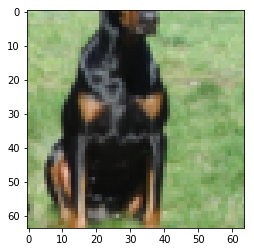

In [114]:
# check how a transform affects an image
tr = transforms.Compose([
        transforms.Resize(im_size),
        transforms.CenterCrop(im_size),
    ])
plt.imshow(tr(Image.open(dog_files[80])))

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: I have resized and augmented the training dataset using torchvision "transforms". To augment the training set I perform a randomized resize-crop as well as a horizontal flip. In validation and test sets, I perform a resize operation and a centered crop. I have noticed that in some images the centered crop is not optimal as it cuts out dog's head. The size of images in all sets (training, validation, test) I set to 64. The motivation behind 64 is simple. I have randomly displayed images and tried to recognize the dog/breed. I have noticed that at the image sizes below 64 I cannot differentiate between the dog breeds.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [86]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer (sees im_sizexim_sizex3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # convolutional layer (sees im_size/2xim_size/2x16 tensor after pool)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # convolutional layer (sees im_size/4xim_size/4x32 tensor after pool)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (64 * im_size/8 * im_size/8 -> 800)
        self.fc1 = nn.Linear(64 * im_size/8 * im_size/8, 800)
        # linear layer (800 -> 133)
        self.fc2 = nn.Linear(800, 133)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)       
    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flatten image input
        x = x.view(-1, 64 * im_size/8 * im_size/8)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer
        x = self.fc2(x)        
        return x

    

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
    
print(model_scratch)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096.0, out_features=800, bias=True)
  (fc2): Linear(in_features=800, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ I have decided to start with an example of CNN that I have found on Udacity's github profile. https://github.com/udacity/deep-learning-v2-pytorch/blob/master/convolutional-neural-networks/cifar-cnn/cifar10_cnn_solution.ipynb This network has a similar task, but it has a lot less classes at the input. I have adapted all the layers to fit my own problem: increased the dimensions of input data and increased the number of neurons in the first fully connected layer (as well as in the second layer). The reason for the latter is to allow the network to capture more variety. I have left the dropout layers unchanged becasue I think they are appropriate for such a probelm and will helps us not to overfit to the training data. The activation function and maxpool seemed sensible and I also kept them unchanged.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [17]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [18]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output,target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output,target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss    
    # return trained model
    return model

In [19]:
# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')


Epoch: 1 	Training Loss: 4.889011 	Validation Loss: 4.887380
Validation loss decreased (inf --> 4.887380).  Saving model ...
Epoch: 2 	Training Loss: 4.883809 	Validation Loss: 4.883566
Validation loss decreased (4.887380 --> 4.883566).  Saving model ...
Epoch: 3 	Training Loss: 4.877003 	Validation Loss: 4.878194
Validation loss decreased (4.883566 --> 4.878194).  Saving model ...
Epoch: 4 	Training Loss: 4.868570 	Validation Loss: 4.876290
Validation loss decreased (4.878194 --> 4.876290).  Saving model ...
Epoch: 5 	Training Loss: 4.863667 	Validation Loss: 4.873661
Validation loss decreased (4.876290 --> 4.873661).  Saving model ...
Epoch: 6 	Training Loss: 4.859084 	Validation Loss: 4.869127
Validation loss decreased (4.873661 --> 4.869127).  Saving model ...
Epoch: 7 	Training Loss: 4.849947 	Validation Loss: 4.857648
Validation loss decreased (4.869127 --> 4.857648).  Saving model ...
Epoch: 8 	Training Loss: 4.833183 	Validation Loss: 4.832846
Validation loss decreased (4.85764

Epoch: 72 	Training Loss: 3.891505 	Validation Loss: 3.945940
Epoch: 73 	Training Loss: 3.896198 	Validation Loss: 3.972899
Epoch: 74 	Training Loss: 3.878584 	Validation Loss: 3.950613
Epoch: 75 	Training Loss: 3.849542 	Validation Loss: 3.915048
Validation loss decreased (3.919572 --> 3.915048).  Saving model ...
Epoch: 76 	Training Loss: 3.843432 	Validation Loss: 3.915808
Epoch: 77 	Training Loss: 3.840995 	Validation Loss: 3.886502
Validation loss decreased (3.915048 --> 3.886502).  Saving model ...
Epoch: 78 	Training Loss: 3.812173 	Validation Loss: 3.898769
Epoch: 79 	Training Loss: 3.796704 	Validation Loss: 3.858226
Validation loss decreased (3.886502 --> 3.858226).  Saving model ...
Epoch: 80 	Training Loss: 3.783718 	Validation Loss: 3.873698
Epoch: 81 	Training Loss: 3.739577 	Validation Loss: 3.875636
Epoch: 82 	Training Loss: 3.772544 	Validation Loss: 3.899843
Epoch: 83 	Training Loss: 3.753975 	Validation Loss: 4.006623
Epoch: 84 	Training Loss: 3.724017 	Validation Lo

In [20]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [21]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.748509


Test Accuracy: 14% (123/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [22]:
## TODO: Specify data loaders
import torch
from torchvision import datasets
import os

batch_size = 8
im_size = 224
data_dir = '/data/dog_images/'
traindir = '/data/dog_images/train'
valdir = '/data/dog_images/valid'
testdir = '/data/dog_images/test'

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

train_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(traindir, transforms.Compose([
        transforms.RandomResizedCrop(im_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize,
    ])),
    batch_size=batch_size, shuffle=True)

valid_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(valdir, transforms.Compose([
        transforms.Resize(im_size),
        transforms.CenterCrop(im_size),
        transforms.ToTensor(),
        normalize,
    ])),
    batch_size=batch_size, shuffle=False)

test_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(testdir, transforms.Compose([
        transforms.Resize(im_size),
        transforms.CenterCrop(im_size),
        transforms.ToTensor(),
        normalize,
    ])),
    batch_size=batch_size, shuffle=False)

loaders_transfer = {'train':train_loader,'valid':valid_loader,'test':test_loader}

# data_transfer is used for plotting later
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
data_transfer = {x: datasets.ImageFolder(os.path.join(data_dir, x), preprocess)
                  for x in ['train', 'valid', 'test']}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [87]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

# define VGG16 model
model_transfer = models.vgg16(pretrained=True)

#freeze weights of the convolutional part
for param in model_transfer.features.parameters():
    param.require_grad = False

#modify the last layer
num_features = model_transfer.classifier[6].in_features # get number of input feats
features = list(model_transfer.classifier.children())[:-1] #  removing last layer
features.extend([nn.Linear(num_features, 133)]) # add layer with 133 outputs
model_transfer.classifier = nn.Sequential(*features) # replace the model classifier
print(model_transfer)
# check if CUDA is available
use_cuda = torch.cuda.is_available()

if use_cuda:
    model_transfer = model_transfer.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ I have decided to use a pretrained CNN VGG16 network because it has the ability to detect dogs with high accuracy. However, the fully connected layers need to be retrained for our target application (dog breed classification), whereas the "feature-extracting" part (convolutional layer) is powerful enough and thus I decide to keep the weights of the convolutional kernels frozen during the traing. The last fully connected layer is modified to match the number of classes in our problem (133). 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [24]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [25]:
# train the model
model_transfer = train(3, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')


Epoch: 1 	Training Loss: 2.723132 	Validation Loss: 0.754525
Validation loss decreased (inf --> 0.754525).  Saving model ...
Epoch: 2 	Training Loss: 1.358964 	Validation Loss: 0.576041
Validation loss decreased (0.754525 --> 0.576041).  Saving model ...
Epoch: 3 	Training Loss: 1.160594 	Validation Loss: 0.519624
Validation loss decreased (0.576041 --> 0.519624).  Saving model ...


In [26]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [27]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.552299


Test Accuracy: 82% (691/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [28]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from PIL import Image
Image.LOAD_TRUNCATED_IMAGES = True
import torchvision.transforms as transforms
from torchvision import datasets

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
                   
    '''
    Use re-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Dog breed (string)
    '''
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    im = Image.open(img_path)
    preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(im)
    input_batch = input_tensor.unsqueeze(0)
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model_transfer.to('cuda')

    with torch.no_grad():
        output = model_transfer(input_batch)

    # The output has unnormalized scores. To get probabilities, you can run a softmax on it.
    prob = torch.nn.functional.softmax(output[0], dim=0)
   
    return class_names[int(np.argmax(prob))]# predicted class index

Predicted breed:  Cane corso


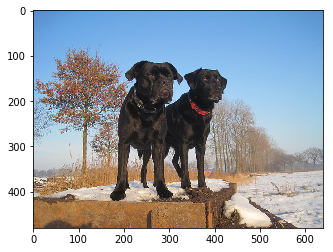

Predicted breed:  Borzoi


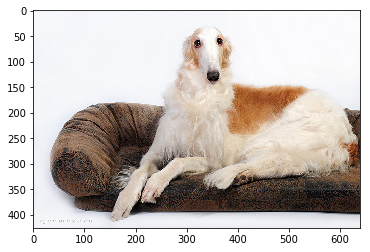

Predicted breed:  Maltese


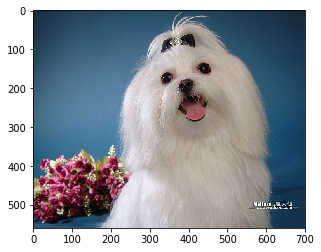

Predicted breed:  Icelandic sheepdog


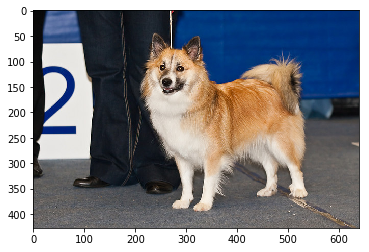

Predicted breed:  Lowchen


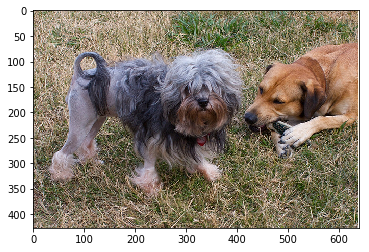

In [29]:
%matplotlib inline
import random
for file in random.sample(list(dog_files),5):
    breed = predict_breed_transfer(file)
    print('Predicted breed: ',breed)
    image = Image.open(file)
    plt.imshow(image)
    plt.show()

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [30]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
%matplotlib inline
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if face_detector(img_path):
        print('Hi human!')
        image = Image.open(img_path)
        plt.imshow(image)
        plt.show()
        print('You look like: ', predict_breed_transfer(img_path))
    elif dog_detector(img_path):
        print('Hi dog!')
        image = Image.open(img_path)
        plt.imshow(image)
        plt.show()
        print('You seem to be a ', predict_breed_transfer(img_path))
    else:
        print('Hi stranger!')
        image = Image.open(img_path)
        plt.imshow(image)
        plt.show()
        print('You are neither a dog nor a human!')

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ Compared to the performance of the simple "hand-made" classifier, the transfer learing classifier performs a lot better than expected. I can list some of possible improvemnt points: 1) The algorithm for detection of humans does not look for both dog and human(face). It could happen that a dog and its owner are in the same picture (few cases observed during dataset exploration). My algorithm would detect this image as a human and then determine the similarity using the dog-breed classifier, which would most certainly give the breed of the dog. 2) The algorithm could use the boundary of a human face (from Haar's detector) to make sure that it is certainly working with a human face. 3) I could augment the training dataset with more transformations.   

Hi human!


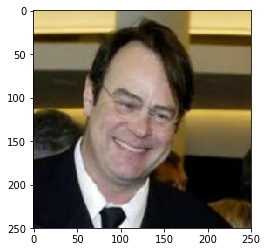

You look like:  Basenji
Hi human!


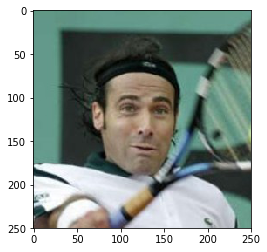

You look like:  Dogue de bordeaux
Hi human!


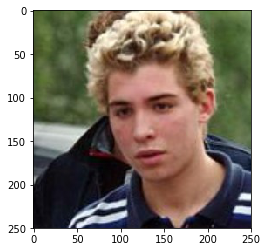

You look like:  Otterhound
Hi dog!


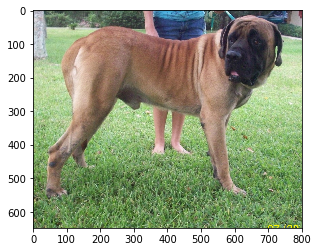

You seem to be a  Bullmastiff
Hi dog!


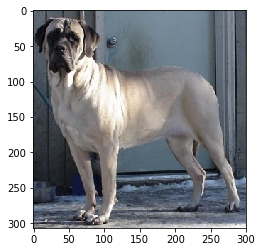

You seem to be a  Bullmastiff
Hi dog!


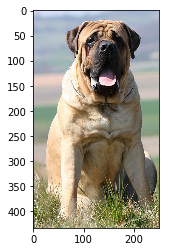

You seem to be a  Bullmastiff


In [31]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

In [32]:
import numpy as np
from glob import glob

# load my images in folder /myimages 
my_files = np.array(glob("./myimages/*"))

Hi dog!


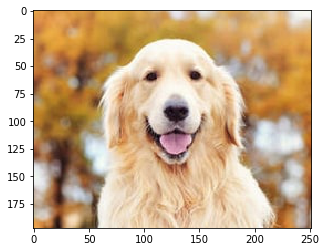

You seem to be a  Golden retriever
Hi human!


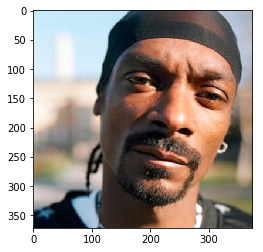

You look like:  Xoloitzcuintli
Hi dog!


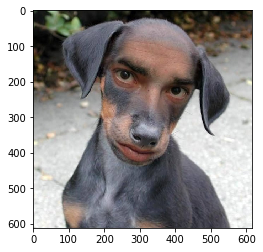

You seem to be a  Dachshund
Hi stranger!


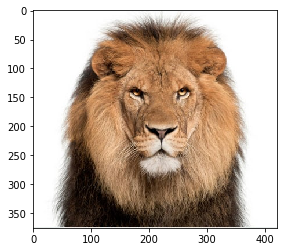

You are neither a dog nor a human!
Hi human!


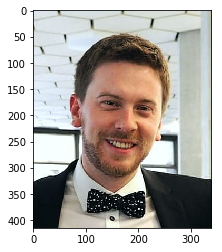

You look like:  Basenji
Hi stranger!


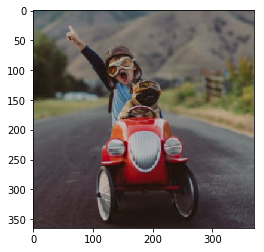

You are neither a dog nor a human!


In [33]:
for file in my_files:
    run_app(file)